In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv('placement.csv')

In [51]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package in lpa')

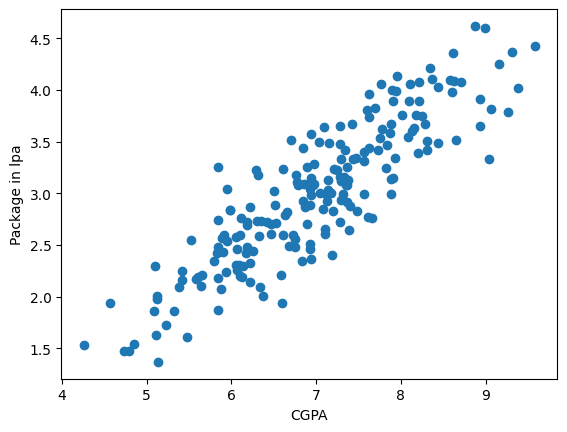

In [52]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package in lpa")

In [53]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [54]:
X.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [55]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression


In [58]:
lr = LinearRegression()

In [59]:
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
print(X_test.shape, X_train.shape)

(40, 1) (160, 1)


In [61]:
X_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


In [62]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
9      3.51
18     2.98
55     3.39
75     3.28
150    2.73
104    3.74
135    2.60
137    3.13
164    3.82
76     3.15
Name: package, dtype: float64

In [63]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.78031348])

Text(0, 0.5, 'Package in lpa')

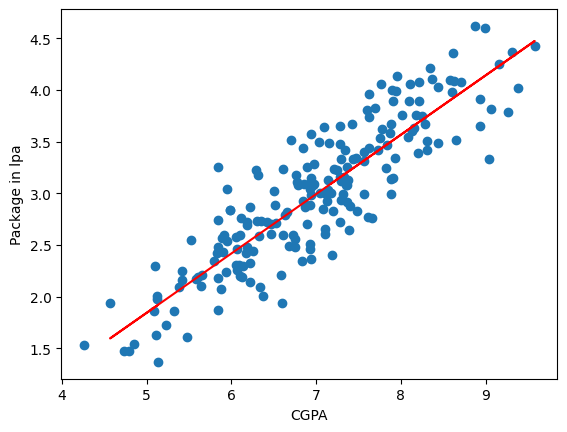

In [64]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel("CGPA")
plt.ylabel("Package in lpa")

In [65]:
m = lr.coef_ # slope
m

array([0.57425647])

In [66]:
b = lr.intercept_ # b
b

-1.0270069374542108

In [67]:
# y = mx + b

In [68]:
# making my own model
class MyLR:
    def __init__(self):
        self.m = None
        self.b = None
    def fit(self, X, y):
        numerator = 0
        denominator = 0
        X_bar = X.mean()
        y_bar = y.mean()
        for i in range(X.shape[0]):
            numerator += ((X[i]-X_bar)*(y[i]-y_bar))
            denominator += (X[i]-X_bar)**2
        self.m = numerator/denominator
        self.b = y_bar - (self.m*X_bar)
        print(f"m: {self.m} and b: {self.b}")
    def predict(self, X):
        return self.m * X + self.b

In [69]:
X_v = df.iloc[:, 0].values
y_v = df.iloc[:, -1].values # coz we gonna use numpy array

In [70]:
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_v, y_v, test_size=0.2, random_state=42)

In [71]:
lrm = MyLR()

In [72]:
lrm.fit(X_train_v, y_train_v) #same same wow

m: 0.5742564727019197 and b: -1.0270069374542108


In [73]:
print(lrm.predict(X_test_v[0]))

2.7803134765595168


In [74]:
y_pred = lr.predict(X_test)

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [76]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
9      3.51
18     2.98
55     3.39
75     3.28
150    2.73
104    3.74
135    2.60
137    3.13
164    3.82
76     3.15
Name: package, dtype: float64

In [77]:
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [78]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

MAE: 0.23150985393278373


In [79]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

MSE: 0.08417638361329656


In [80]:
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

RMSE: 0.2901316659954521


In [81]:
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.7730984312051673


In [82]:
r2 = r2_score(y_test, y_pred)
X_test.shape

(40, 1)

In [83]:
adjusted_r2 = 1- ((1-r2)*(40-1)/(40-1-1))
adjusted_r2

0.7671273372895138

In [84]:
# checking the application of adjusted r2
new_df = df.copy()
new_df['random_feature'] = np.random.random(200);
new_df.head()

,cgpa,package,random_feature
0,6.89,3.26,0.528995
1,5.12,1.98,0.039160
2,7.82,3.25,0.102943
3,7.42,3.67,0.833111
4,6.94,3.57,0.422374


Text(0, 0.5, 'Package (in lpa)')

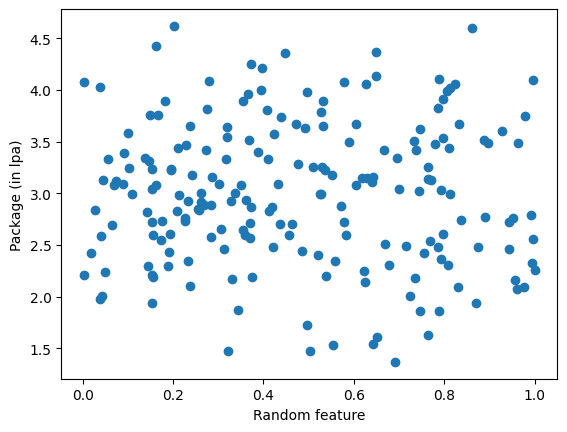

In [85]:
plt.scatter(new_df['random_feature'], new_df['package'])
plt.xlabel("Random feature")
plt.ylabel("Package (in lpa)")

In [86]:
X_ar = new_df[['package', 'random_feature']]
y_ar = new_df['cgpa']
X_ar

,package,random_feature
0,3.26,0.528995
1,1.98,0.039160
2,3.25,0.102943
3,3.67,0.833111
4,3.57,0.422374
...,...,...
195,2.46,0.312453
196,2.57,0.370110
197,3.24,0.195566
198,3.96,0.365686


In [87]:
X_train_ar, X_test_ar, y_train_ar, y_test_ar = train_test_split(X_ar, y_ar, test_size=0.2, random_state=42)

In [88]:
lrar = LinearRegression()

In [89]:
lrar.fit(X_train_ar, y_train_ar)

LinearRegression()

In [90]:
y_pred_ar = lrar.predict(X_test_ar)

In [91]:
print(f"new R2: {r2_score(y_test_ar, y_pred_ar)}")

new R2: 0.7516813418587985


In [ ]:
new_r2 = r2_score(y_test_ar, y_pred_ar)
adjusted_r2 = 1- ((1-new_r2)*(40-1)/(40-1-2))
adjusted_r2 # while r2 remain same adjusted r2 decreased which says that column was not necessary

0.7382587116890038